In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import numpy as np

spark = SparkSession.builder.master("local[10]").getOrCreate()
spark.sparkContext.setLogLevel("ERROR")

df = spark.read.parquet("./parquet/run1016_srppac.parquet").select("id_x","timing_x","charge_x","id_y","timing_y","charge_y")
df.show(5)

Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
26/01/15 04:58:29 WARN Utils: Your hostname, gpuana02, resolves to a loopback address: 127.0.1.1; using 192.168.1.216 instead (on interface enp4s0)
26/01/15 04:58:29 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
26/01/15 04:58:29 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
26/01/15 04:58:29 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
26/01/15 04:58:29 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.
26/01/15 04:58:29 WARN Utils: Service 'SparkUI' could not bind on port 4042. Attempting port 4043.


+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|                id_x|            timing_x|            charge_x|                id_y|            timing_y|            charge_y|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|              [8, 9]|[-37.916718033375...|[25.3062377938185...|         [13, 9, 14]|[-40.766230837907...|[35.2897848891443...|
|            [16, 17]|[-43.127611454343...|[45.7307433673995...|             [13, 9]|[-40.749302959418...|[46.6852356659946...|
|[22, 22, 22, 22, ...|[-40.246512253288...|[34.6716986928368...|[16, 16, 16, 16, ...|[-39.890678813520...|[27.7139252685301...|
|        [16, 19, 20]|[-43.788676721887...|[50.0553926219872...|        [22, 25, 21]|[-43.664828451612...|[49.9024897927010...|
|[7, 7, 7, 7, 4, 4...|[-40.341492216270...|[44.6826863594324...|[21, 21, 21, 21, ...|[-42.838445028159..

Statistics:
[[     0.      0.      0.]
 [     0. 257701.      0.]
 [     0.    966.      0.]]
Statistics:
[[     0.      0.      0.]
 [     0. 415691.      0.]
 [     0.    840.      0.]]
Statistics:
[[     0.      0.      0.]
 [     0. 258667.      0.]
 [     0.      0.      0.]]
Statistics:
[[     0.      0.      0.]
 [     0. 416531.      0.]
 [     0.      0.      0.]]


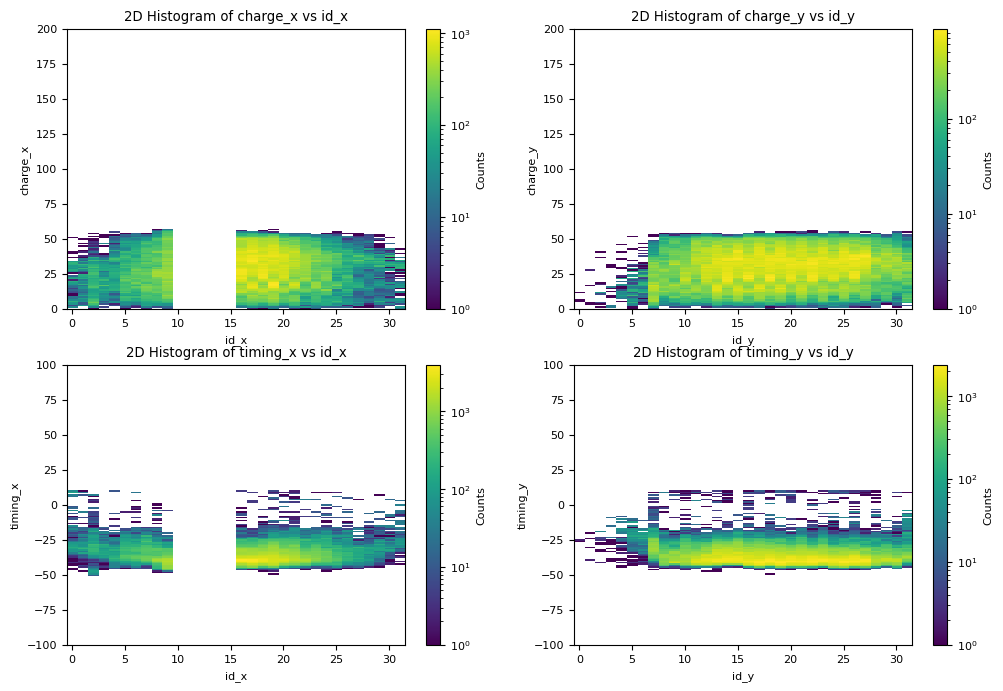

In [2]:
from hist.sparkHist2d import Hist2DArrays
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

plt.figure(0, figsize=(12,8))
plt.rcParams["font.size"] = 8
plt.subplot2grid((2,2),(0,0))
h = Hist2DArrays(df, ["id_x","charge_x"], [33,200], [[-0.5, 31.5], [0, 200]], norm=LogNorm(), interpolation='none')
plt.subplot2grid((2,2),(0,1))
h = Hist2DArrays(df, ["id_y","charge_y"], [33,200], [[-0.5, 31.5], [0, 200]], norm=LogNorm(), interpolation='none')
plt.subplot2grid((2,2),(1,0))
h = Hist2DArrays(df, ["id_x","timing_x"], [33,200], [[-0.5, 31.5], [-100, 100]], norm=LogNorm(), interpolation='none')
plt.subplot2grid((2,2),(1,1))
h = Hist2DArrays(df, ["id_y","timing_y"], [33,200], [[-0.5, 31.5], [-100, 100]], norm=LogNorm(), interpolation='none')

plt.show()